In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os, sys, time

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

print(tf.__version__)
print(sys.version_info)

2.0.0
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[: 5000], x_train_all[5000: ]
y_valid, y_train = y_train_all[: 5000], y_train_all[5000: ]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


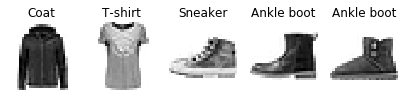

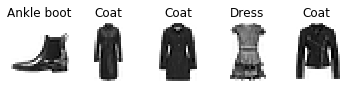

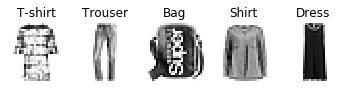

In [3]:
def show_single_image(image_arr):
    plt.imshow(image_arr, cmap="binary")


def show_multiple_images(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)

    plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = row * n_cols + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_data[index]])
        plt.show()


class_names = ['T-shirt', 'Trouser',  'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_multiple_images(3, 5, x_train, y_train, class_names)

#### selu
selu: 带有归一化的relu。类似BatchNorm的作用，此例中selu更好一些。

#### AlphaDropout
AlphaDropout:  更复杂的dropout实现，
- 均值方差不变，
- 归一化性质也不变。  

同时一般在最后几层添加dropout

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                                                    padding='same',
                                                    activation='relu',
                                                    input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                                                    padding='same',
                                                    activation='selu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

# y -> should be one-hot vector
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# model.layers
model.summary()

In [ ]:
logdir = '.\cnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, 'fashion_mnist_model.h5')

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), 
                    callbacks=callbacks)

In [ ]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curve(history)

### 深度可分离卷积

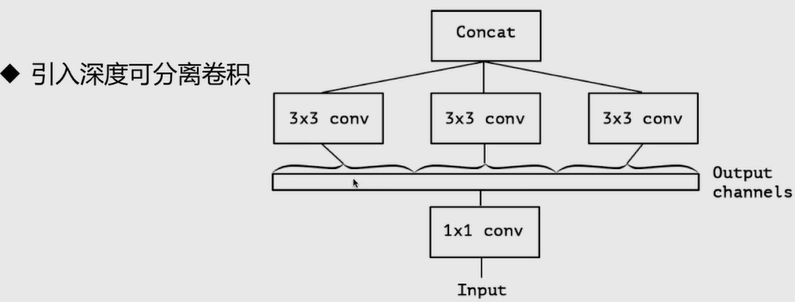

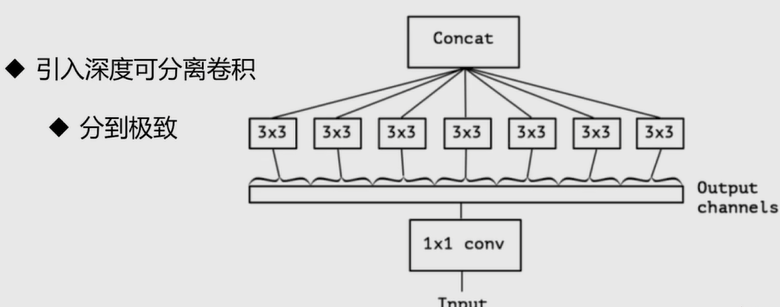
一个channel一个卷积核

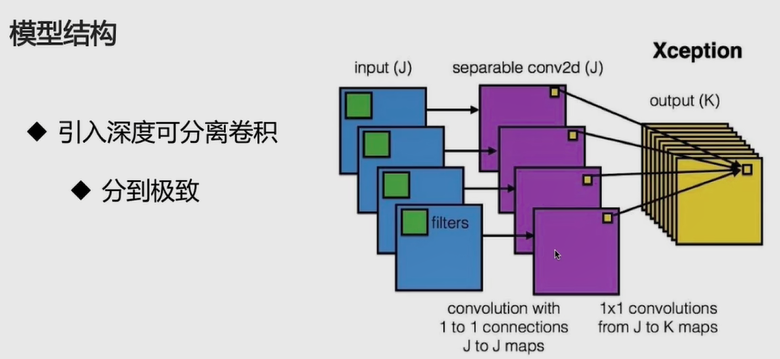

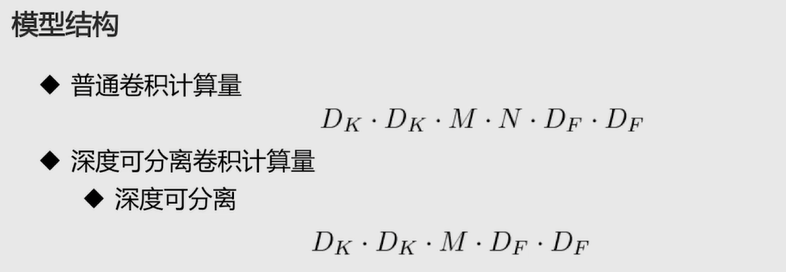
M -- 输入通道；N -- 输出通道

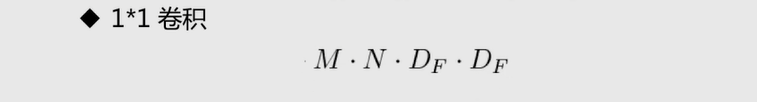

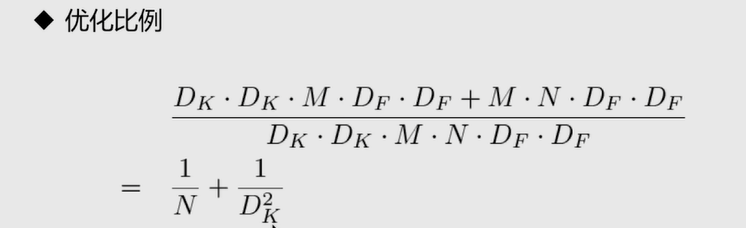

In [ ]:
# SeparableConv2D

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                                                    padding='same',
                                                    activation='relu',
                                                    input_shape=(28, 28, 1)))
model.add(keras.layers.SeparableConv2D(filters=32, kernel_size=3,
                                                                    padding='same',
                                                                    activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

# y -> should be one-hot vector
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# model.layers
model.summary()